<a href="https://colab.research.google.com/github/lingz24/RoadCharge/blob/main/caiso_lmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [14]:
Parent = '/content/gdrive/MyDrive/RoadCharge/'

fpath = Parent+'caiso_lmp/'

df = pd.read_csv(fpath + 'caiso_lmp_rt_15min_zones_2023Q2.csv', skiprows=3)

In [15]:
df.head(3)

,UTC Timestamp (Interval Ending),Local Timestamp Pacific Time (Interval Beginning),Local Timestamp Pacific Time (Interval Ending),Local Date,Hour Number,NP-15 LMP,SP-15 LMP,ZP-26 LMP,NP-15 (Congestion),SP-15 (Congestion),ZP-26 (Congestion),NP-15 (Energy),SP-15 (Energy),ZP-26 (Energy),NP-15 (Loss),SP-15 (Loss),ZP-26 (Loss)
0,2023-04-01 07:15:00,2023-04-01 00:00:00,2023-04-01 00:15:00,2023-04-01,1,76.96286,66.07382,64.70253,3.58453,-5.99860,-6.94960,75.05199,75.05199,75.05199,-1.67366,-2.97956,-3.39985
1,2023-04-01 07:30:00,2023-04-01 00:15:00,2023-04-01 00:30:00,2023-04-01,1,57.29980,55.56284,54.94745,0.41096,-0.99113,-1.14826,58.75126,58.75126,58.75126,-1.86242,-2.19730,-2.65556
2,2023-04-01 07:45:00,2023-04-01 00:30:00,2023-04-01 00:45:00,2023-04-01,1,58.14418,56.77449,56.24001,0.33489,-0.80768,-0.93573,59.76974,59.76974,59.76974,-1.96045,-2.18757,-2.59401


In [16]:
df.columns

Index(['UTC Timestamp (Interval Ending)',
       'Local Timestamp Pacific Time (Interval Beginning)',
       'Local Timestamp Pacific Time (Interval Ending)', 'Local Date',
       'Hour Number', 'NP-15 LMP', 'SP-15 LMP', 'ZP-26 LMP',
       'NP-15 (Congestion)', 'SP-15 (Congestion)', 'ZP-26 (Congestion)',
       'NP-15 (Energy)', 'SP-15 (Energy)', 'ZP-26 (Energy)', 'NP-15 (Loss)',
       'SP-15 (Loss)', 'ZP-26 (Loss)'],
      dtype='object')

In [17]:
df['Local Timestamp Pacific Time (Interval Beginning)'] = pd.to_datetime(df['Local Timestamp Pacific Time (Interval Beginning)'])

df['local hour'] = df['Local Timestamp Pacific Time (Interval Beginning)'].dt.hour

92.20600068973445


<Axes: xlabel='local hour', ylabel='NP-15 LMP'>

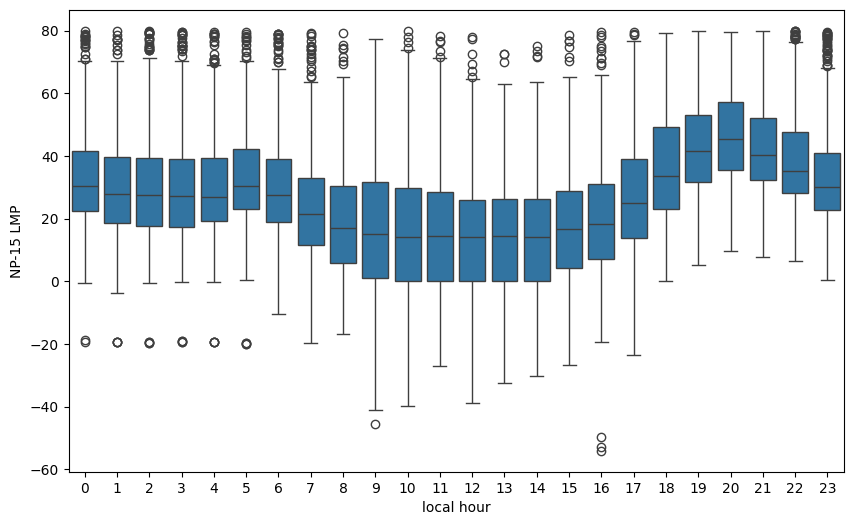

In [20]:
df2 = df[df['NP-15 LMP'] < 80 ]
print((len(df2)/len(df))*100)

plt.figure(figsize=(10, 6))
sns.boxplot(x='local hour', y='NP-15 LMP', data=df2)

92.75778825152317


<Axes: xlabel='local hour', ylabel='SP-15 LMP'>

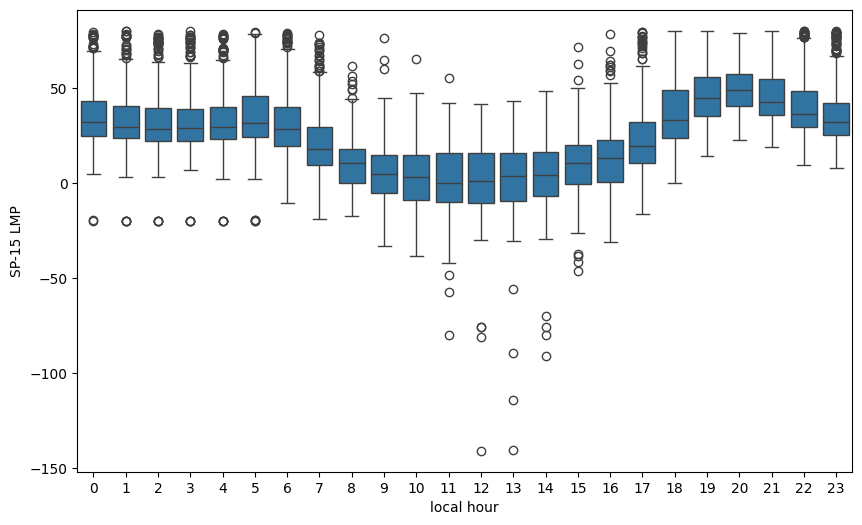

In [21]:
df2 = df[df['SP-15 LMP'] < 80 ]
print((len(df2)/len(df))*100)

plt.figure(figsize=(10, 6))
sns.boxplot(x='local hour', y='SP-15 LMP', data=df2)

93.56247844579838


<Axes: xlabel='local hour', ylabel='ZP-26 LMP'>

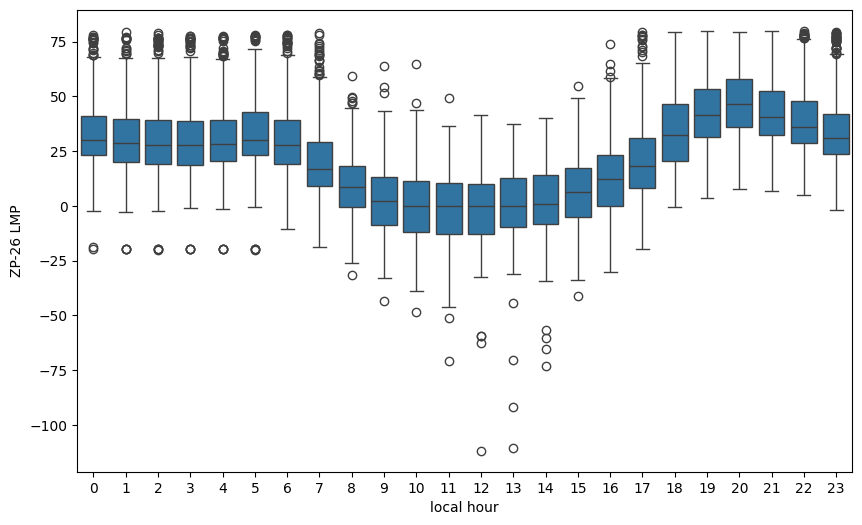

In [22]:
df2 = df[df['ZP-26 LMP'] < 80 ]
print((len(df2)/len(df))*100)

plt.figure(figsize=(10, 6))
sns.boxplot(x='local hour', y='ZP-26 LMP', data=df2)